In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Import results and take them to one file

In [7]:
# all csv to one csv
# List of filenames to read
filenames = ["../results/p3s_atiam0/mushra.csv", "../results/p3s_atiam1/mushra.csv", "../results/p3s_atiam2/mushra.csv", "../results/p3s_atiam3/mushra.csv", "../results/p3s_atiam4/mushra.csv"]
# List to hold dataframes
dfs = []
# Loop over filenames, read csv and append to dfs list
for filename in filenames:
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate dataframes into one big dataframe
big_df = pd.concat(dfs, ignore_index=True)
# Save to file
big_df.to_csv("../results/total_mushra.csv", index=False)

# define read function and analysis function

In [8]:
# data is in csv, the first line has the column names, import it as a dataframe
def read_data(path: str):
    data = pd.read_csv(path)
    # print test name
    print("Test name is:",data["session_test_id"][0])
    # count and print the number of unique values in the column "session_uuid"
    print("Number of evaluations is:",data["session_uuid"].nunique())
    print("Number of evaluators is:",data['email'].nunique())
    # print keys of the dataframe
    print("Available information is: ", ", ".join(list(data.columns)))
    # FIX EXCEPTIONS
    # if evaluator's email is welshwitch66@gmail.com change their years of musical training to 20
    data.loc[data['email'] == 'welshwitch66@gmail.com', 'musical_training_years'] = 20
    # if years of musical training is "many", change it to 10
    data.loc[data['musical_training_years'] == 'many', 'musical_training_years'] = 10
    # if years of musical training is "7 (as a producer)", change it to 7
    data.loc[data['musical_training_years'] == '7 (as a producer)', 'musical_training_years'] = 7
    # if years of musical training is "38 ans", change it to 38
    data.loc[data['musical_training_years'] == '38 ans', 'musical_training_years'] = 38
    return data


In [9]:

# keys are: session_test_id,email,age,gender,musical_training_years,session_uuid,trial_id,rating_stimulus,rating_score,rating_time,rating_comment
# each evaluator has a unique session_uuid
# analyze evaluators
def analyze_evaluators(df, remove_inexperienced_evaluators=False):
    # Count the number of evaluators with less than 5 years of musical training
    num_inexperienced_evaluators = df[pd.to_numeric(df['musical_training_years'], errors='coerce') < 5]['session_uuid'].nunique()
    print(f"{num_inexperienced_evaluators} evaluators have less than 5 years of musical training.")
    if remove_inexperienced_evaluators:
        print("They will be excluded from the analysis.")
        # Remove the inexperienced evaluators from the data
        df = df[pd.to_numeric(df['musical_training_years'], errors='coerce') >= 5]
        print("Number of evaluations is:",df["session_uuid"].nunique())
    
    # Count the number of unique evaluators
    num_evaluators = df['email'].nunique()
    # Count the number of unique male evaluators
    num_male_evaluators = df[df['gender'] == 'male']['session_uuid'].nunique()
    # Count the number of unique female evaluators
    num_female_evaluators = df[df['gender'] == 'female']['session_uuid'].nunique()
    print(f"We have {num_male_evaluators} male evaluators and {num_female_evaluators} female evaluators out of {num_evaluators} unique evaluators.")

    # Calculate the average age
    avg_age = df['age'].mean(skipna=True)
    print(f"The average age of evaluators is {avg_age:.2f} years.")
    # Calculate the average years of musical training, ignoring non-numeric values
    avg_training_years = pd.to_numeric(df['musical_training_years'], errors='coerce').mean(skipna=True)
    print(f"The average years of musical training of the evaluators is {avg_training_years:.2f} years.")

    # Find the oldest and youngest evaluators
    oldest_evaluator = df.loc[df['age'].idxmax()]
    youngest_evaluator = df.loc[df['age'].idxmin()]
    print(f"The oldest evaluator is {oldest_evaluator['email']} (age {oldest_evaluator['age']}), and the youngest evaluator is {youngest_evaluator['email']} (age {youngest_evaluator['age']}).")

    # Count the number of evaluators with emails ending in "@ircam.fr" or "@atiam.fr"
    ircam_evaluators = df[df['email'].str.endswith('@ircam.fr')]['email'].unique()
    atiam_evaluators = df[df['email'].str.endswith('@atiam.fr')]['email'].unique()
    num_ircam_evaluators = len(ircam_evaluators)
    num_atiam_evaluators = len(atiam_evaluators)
    if num_ircam_evaluators > 0:
        print(f"{num_ircam_evaluators} evaluators have emails ending in '@ircam.fr'.")
        # print("Their names are:")
        # print("\n".join(ircam_evaluators))
    if num_atiam_evaluators > 0:
        print(f"{num_atiam_evaluators} evaluators have emails ending in '@atiam.fr'.")
        # print("Their names are:")
        # print("\n".join(atiam_evaluators))

    return df

# i=3
# filename = "../results/p3s_atiam"+str(i)+"/mushra.csv"
# data = read_data(filename)
# data = analyze_evaluators(data, remove_inexperienced_evaluators=False)


# input data

In [35]:
# Creat dataframes
data = pd.DataFrame()
data_no_inexperienced = pd.DataFrame()
data_no_inconsistent = pd.DataFrame()
data_no_inexperienced_no_inconsistent = pd.DataFrame()

data = read_data("../results/total_mushra.csv")
print("=====================================")

remove_inexperienced_evaluators = True
remove_inconsistent_evaluators = True
print("=====================================")
print("-----------------ALL EVALUATORS--------------------")
data = analyze_evaluators(data, remove_inexperienced_evaluators=False)
print("=====================================")
print("=====================================")
print("-----------------REMOVED INEXPERIENCED--------------------")
data_no_inexperienced = analyze_evaluators(data, remove_inexperienced_evaluators=True)
print("=====================================")

Test name is: P3S_ATIAM0
Number of evaluations is: 59
Number of evaluators is: 57
Available information is:  session_test_id, email, age, gender, musical_training_years, session_uuid, trial_id, rating_stimulus, rating_score, rating_time, rating_comment
-----------------ALL EVALUATORS--------------------
13 evaluators have less than 5 years of musical training.
We have 42 male evaluators and 16 female evaluators out of 57 unique evaluators.
The average age of evaluators is 32.73 years.
The average years of musical training of the evaluators is 11.26 years.
The oldest evaluator is yves.grenier@telecom-paris.fr (age 72), and the youngest evaluator is berger.clementine@orange.fr (age 21).
11 evaluators have emails ending in '@ircam.fr'.
1 evaluators have emails ending in '@atiam.fr'.
-----------------REMOVED INEXPERIENCED--------------------
13 evaluators have less than 5 years of musical training.
They will be excluded from the analysis.
Number of evaluations is: 45
We have 34 male evalua

# check consistency of envaluators
and if it is bad, delete them

In [22]:
def check_rating_consistency(data, remove_inconsistent_evaluators=False):
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    trials = ['overall', 'interference', 'distortion', 'artifacts']
    count_high_inconsistencies = 0
    count_low_inconsistencies = 0
    for trial in trials:
        trial_data = data[data['trial_id'] == trial]
        for email in trial_data['email'].unique():
            email_data = trial_data[trial_data['email'] == email]
            for stimulus in stimuli_order:
                stimulus_data = email_data[email_data['rating_stimulus'] == stimulus]
                reference_data = email_data[email_data['rating_stimulus'] == 'reference']
                anchor_data = email_data[email_data['rating_stimulus'] == 'anchor']
                if len(stimulus_data) > 0 and len(reference_data) > 0 and len(anchor_data) > 0:
                    stimulus_score = stimulus_data['rating_score'].mean()
                    reference_score = reference_data['rating_score'].mean()
                    anchor_score = anchor_data['rating_score'].mean()
                    if stimulus_score > reference_score:
                        # print(f"{email} rated {stimulus} higher than reference in {trial} trial")
                        count_high_inconsistencies += 1
                        if remove_inconsistent_evaluators:
                            # remove participant from the data
                            data = data[data['email'] != email]
                    elif stimulus_score < anchor_score:
                        # print(f"{email} rated {stimulus} lower than anchor in {trial} trial")
                        count_low_inconsistencies += 1

                # if anchor = 100 remove evaluator
                if len(anchor_data) > 0:
                    anchor_score = anchor_data['rating_score'].mean()
                    if anchor_score == 100:
                        if remove_inconsistent_evaluators:
                            print(f"{email} rated anchor 100 in {trial} trial")
                            # remove participant from the data
                            data = data[data['email'] != email]

    print(f"Found {count_high_inconsistencies} high inconsistencies and {count_low_inconsistencies} low inconsistencies.")
    if remove_inconsistent_evaluators:
        print("Inconsistent evaluators (of referance) have been removed from the data.")
        print("Number of evaluations is:",data["session_uuid"].nunique())
    return data



In [37]:

print("=====================================")
print("-----------------REMOVED INCOHERENT--------------------")
data_no_inconsistent = check_rating_consistency(data, remove_inconsistent_evaluators=True)

print("=====================================")
data_no_inconsistent = analyze_evaluators(data_no_inconsistent, remove_inexperienced_evaluators=False)
print("=====================================")
print("=====================================")
print("-----------------REMOVED INEXPERIENCED AND INCOHERENT--------------------")
data_no_inexperienced_no_inconsistent = check_rating_consistency(data_no_inexperienced, remove_inconsistent_evaluators=True)

print("=====================================")
data_no_inexperienced_no_inconsistent = analyze_evaluators(data_no_inexperienced_no_inconsistent, remove_inexperienced_evaluators=False)
print("=====================================")

-----------------REMOVED INCOHERENT--------------------
Found 21 high inconsistencies and 107 low inconsistencies.
Inconsistent evaluators (of referance) have been removed from the data.
Number of evaluations is: 51
10 evaluators have less than 5 years of musical training.
We have 38 male evaluators and 12 female evaluators out of 49 unique evaluators.
The average age of evaluators is 32.65 years.
The average years of musical training of the evaluators is 11.90 years.
The oldest evaluator is yves.grenier@telecom-paris.fr (age 72), and the youngest evaluator is berger.clementine@orange.fr (age 21).
10 evaluators have emails ending in '@ircam.fr'.
1 evaluators have emails ending in '@atiam.fr'.
-----------------REMOVED INEXPERIENCED AND INCOHERENT--------------------
Found 13 high inconsistencies and 69 low inconsistencies.
Inconsistent evaluators (of referance) have been removed from the data.
Number of evaluations is: 40
0 evaluators have less than 5 years of musical training.
We have 

# Comparison between evaluators

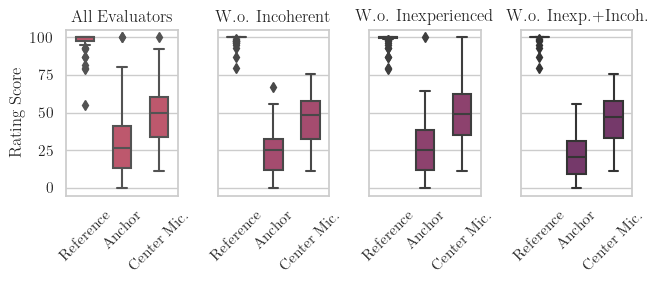

In [24]:
def plot_evaluators_comparison_boxplots(data, data_no_inconsistent, data_no_inexperienced, data_no_inexperienced_no_inconsistent,
                                        save_fig=False, save_path="ratings_boxplot.pdf", show_fig=False):
    # Plot the boxplots
    fig, axs = plt.subplots(ncols=4, figsize=(6,5))
    fig.set_size_inches(w=6.718, h=3)
    stimuli_order = ['reference', 'anchor', 'no_effect_center']#, 'no_effect', 'sto']
    # overall_data = data[data['trial_id'] == 'overall']
    # sns.boxplot(x='rating_stimulus', y='rating_score', data=overall_data,
    #             order=stimuli_order, ax=axs[0], palette=sns.color_palette("flare", 1))
    # sns.stripplot(x='rating_stimulus', y='rating_score', data=overall_data,
    #                 order=stimuli_order, color=".3", size=2.5, ax=axs[0])
    
    sns.set(style="whitegrid")
    for i,d in enumerate([data, data_no_inconsistent, data_no_inexperienced, data_no_inexperienced_no_inconsistent]):
        d = d[ (d["trial_id"] == "overall") | (d["trial_id"] == "interference") | (d["trial_id"] == "distortion") | (d["trial_id"] == "artifacts")]
        d = d.groupby(["rating_stimulus", "email", "age", "gender", "musical_training_years"], as_index=False)["rating_score"].mean()
        # stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
        sns.boxplot(x="rating_stimulus", y="rating_score", data=d, order=stimuli_order,ax=axs[i], color=sns.color_palette("flare", 8)[3+i], width=0.5)

        # sns.stripplot(x="rating_stimulus", y="rating_score", data=d, order=stimuli_order,ax=axs[i], color=".3", size=2.5)
    
        # Set the labels
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')

        # Set the tick labels
        axs[i].set_xticklabels(['Reference', 'Anchor', 'Center Mic.'], rotation=45) #,'Spot Mic.', 'Sp. Mic. + Proc.'], rotation=45)
        if i != 0:
            axs[i].set_yticklabels([])


    axs[0].set_ylabel('Rating Score')
    # Set the titles
    axs[0].set_title('All Evaluators')
    axs[1].set_title('W.o. Incoherent')
    axs[2].set_title('W.o. Inexperienced')
    axs[3].set_title('W.o. Inexp.+Incoh.')



    # bigger and latex text
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Roman"
    })

    # tight layout
    plt.tight_layout()

    # save figure
    if save_fig:
        plt.savefig(save_path, dpi=600)
    if show_fig:
        plt.show()
    else:
        plt.close()


plot_evaluators_comparison_boxplots(data, data_no_inconsistent, data_no_inexperienced, data_no_inexperienced_no_inconsistent,
                                    save_fig=True, save_path='../results/mushra_evaluators_comparison_boxplot.pdf', show_fig=True)

# box plots

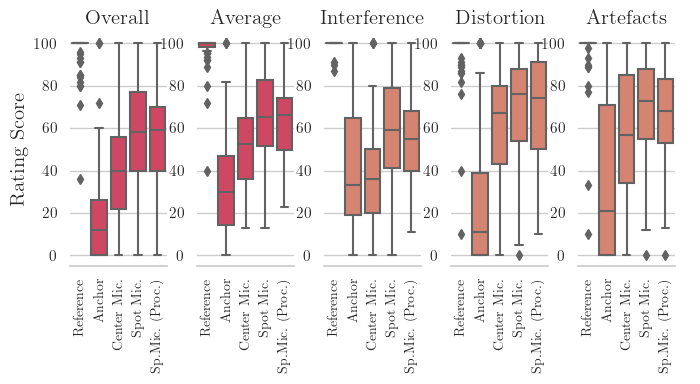

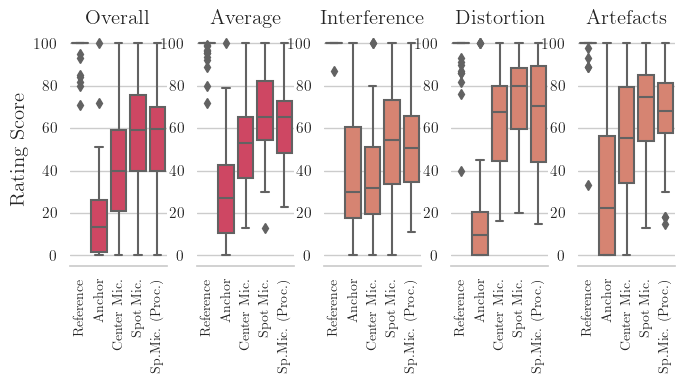

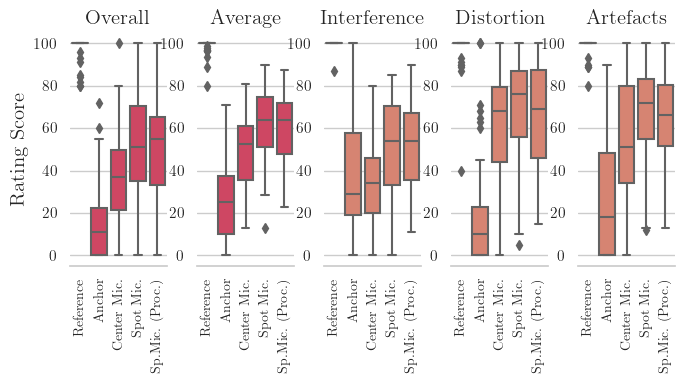

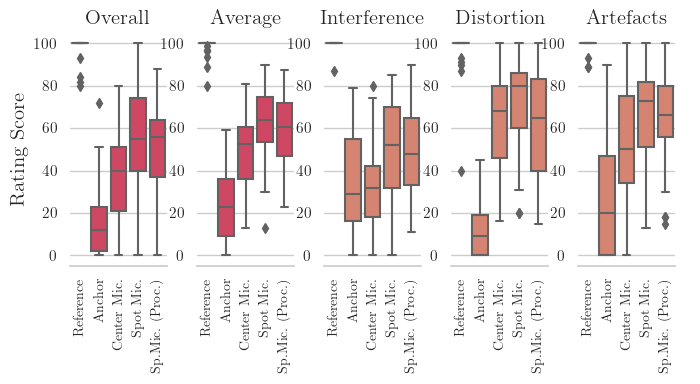

In [26]:
def plot_ratings_boxplot(data, save_fig=False, save_path="ratings_boxplot.pdf", show_fig=False):
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    
    # add a new fifth "trial_id" to data
    new_data = data.copy()
    new_data = new_data[(new_data["trial_id"] == "interference") | (new_data["trial_id"] == "distortion") | (new_data["trial_id"] == "artifacts")]
    # calculate average
    new_data = new_data.groupby(["rating_stimulus", "email", "age", "gender", "musical_training_years"], as_index=False)["rating_score"].mean()
    new_data["trial_id"] = "Average"
    data = pd.concat([data, new_data])


    # Sort the data by trial_id in the order you want to plot
    trial_id_order = ['overall', 'Average', 'interference', 'distortion', 'artifacts']
    data['trial_id'] = pd.Categorical(data['trial_id'], categories=trial_id_order, ordered=True)
    data = data.sort_values('trial_id')

    # Initialize the FacetGrid object  
    g = sns.FacetGrid(data, col="trial_id", col_wrap=5, height=4, aspect=0.6, sharey=False, sharex=False, despine=False)
    g.map(sns.boxplot, "rating_stimulus", "rating_score", order=stimuli_order, color=sns.color_palette("flare", 8)[1])
    
    g.set_axis_labels("", "Rating Score", size=15)
    # set titles for each subplot manually
    g.axes[0].set_title('Overall', size=15)
    g.axes[1].set_title('Average', size=15)
    g.axes[2].set_title('Interference', size=15)
    g.axes[3].set_title('Distortion', size=15)
    g.axes[4].set_title('Artefacts', size=15)
        
    # set color of each box individually in the first two subplots
    for i in range(2):
        for j, patch in enumerate(g.axes[i].patches):
            if j % 5 == 0:
                patch.set_facecolor(sns.color_palette("flare", 8)[3])
            elif j % 5 == 1:
                patch.set_facecolor(sns.color_palette("flare", 8)[3])
            elif j % 5 == 2:
                patch.set_facecolor(sns.color_palette("flare", 8)[3])
            elif j % 5 == 3:
                patch.set_facecolor(sns.color_palette("flare", 8)[3])
            elif j % 5 == 4:
                patch.set_facecolor(sns.color_palette("flare", 8)[3])

    g.add_legend()
    g.despine(left=True)
    g.set_xticklabels(['Reference', 'Anchor', 'Center Mic.' ,'Spot Mic.', 'Sp.Mic. (Proc.)'], rotation=90, size=10)

    # bigger and latex text
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Roman"
    })

    g.tight_layout()
    # set figure size
    fig = g.fig
    fig.set_size_inches(w=6.718, h=4)

    # save figure
    if save_fig:
        plt.savefig(save_path, dpi=600)
    if show_fig:
        plt.show()
    else:
        plt.close()

plot_ratings_boxplot(data, save_fig=True, save_path='../results/mushra_all_boxplot.pdf', show_fig=True)
plot_ratings_boxplot(data_no_inexperienced, save_fig=True, save_path='../results/mushra_no_inexperienced_boxplot.pdf', show_fig=True)
plot_ratings_boxplot(data_no_inconsistent, save_fig=True, save_path='../results/mushra_no_inconsistent_boxplot.pdf', show_fig=True)
plot_ratings_boxplot(data_no_inexperienced_no_inconsistent, save_fig=True, save_path='../results/mushra_no_inexperienced_no_inconsistent_boxplot.pdf', show_fig=True)

# plots across instruments

Instrument:  flute
Test name is: P3S_ATIAM0
Number of evaluations is: 8
Number of evaluators is: 8
Available information is:  session_test_id, email, age, gender, musical_training_years, session_uuid, trial_id, rating_stimulus, rating_score, rating_time, rating_comment
2 evaluators have less than 5 years of musical training.
We have 6 male evaluators and 2 female evaluators out of 8 unique evaluators.
The average age of evaluators is 39.50 years.
The average years of musical training of the evaluators is 14.25 years.
The oldest evaluator is Yves_desvallees@orange.fr  (age 58), and the youngest evaluator is leo.raybois@gmail.com (age 24).
1 evaluators have emails ending in '@ircam.fr'.
Their names are:
bastien.sabarros@ircam.fr
Instrument:  clarinet
Test name is: P3S_ATIAM1
Number of evaluations is: 12
Number of evaluators is: 12
Available information is:  session_test_id, email, age, gender, musical_training_years, session_uuid, trial_id, rating_stimulus, rating_score, rating_time, rat

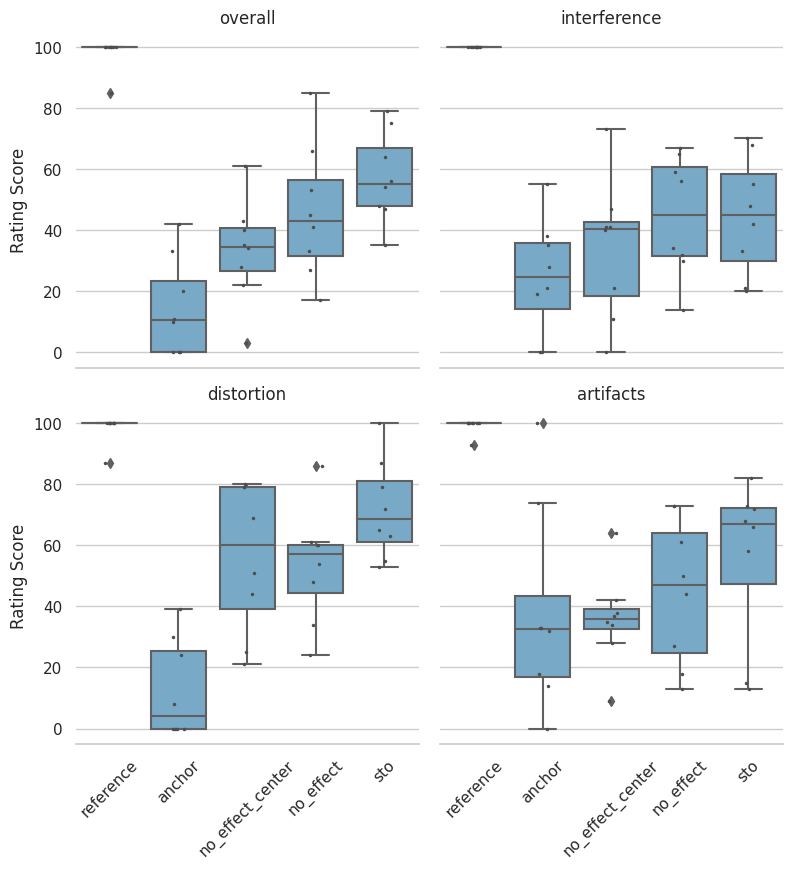

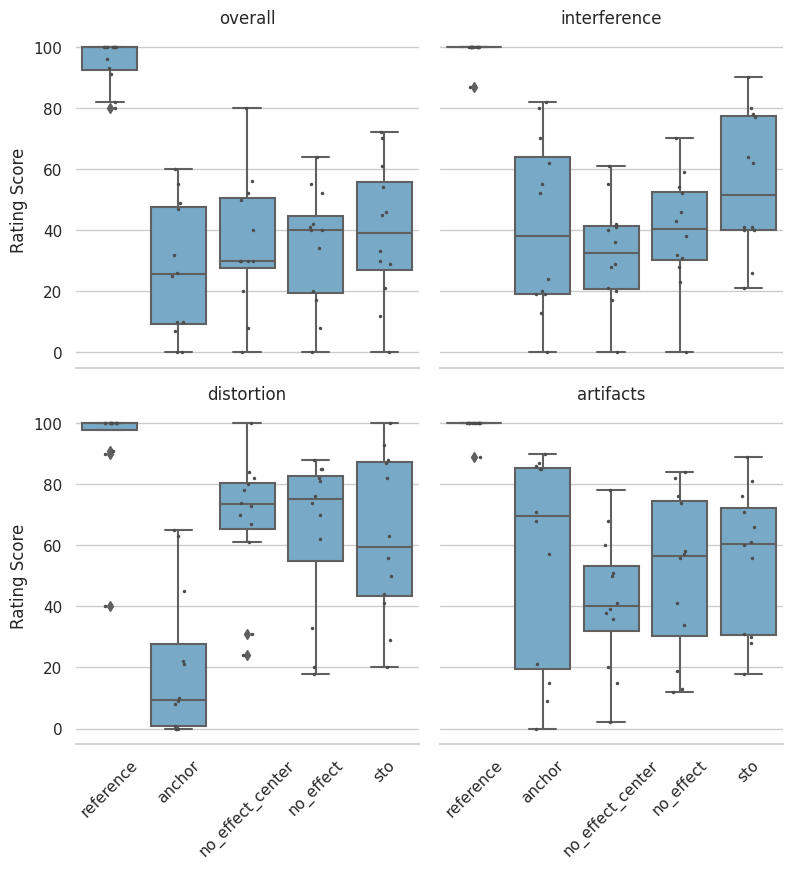

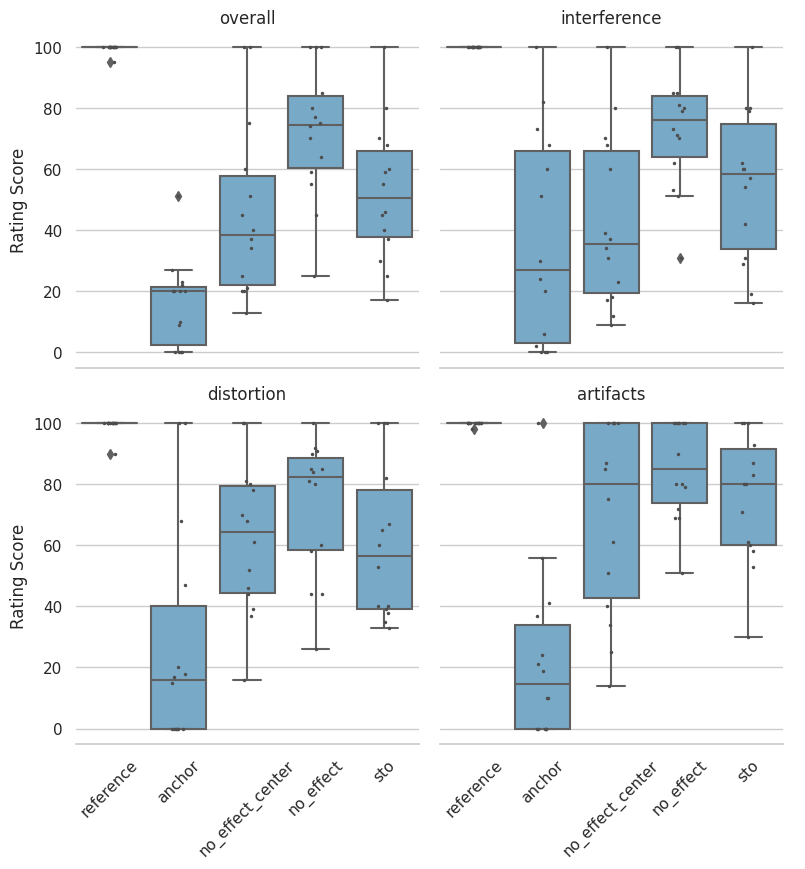

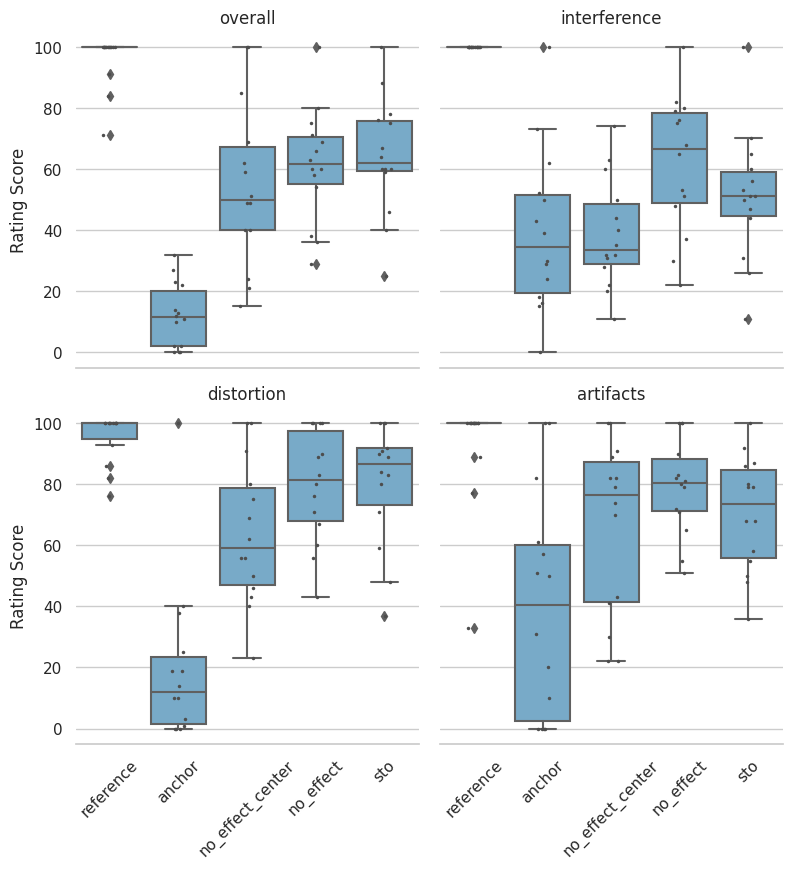

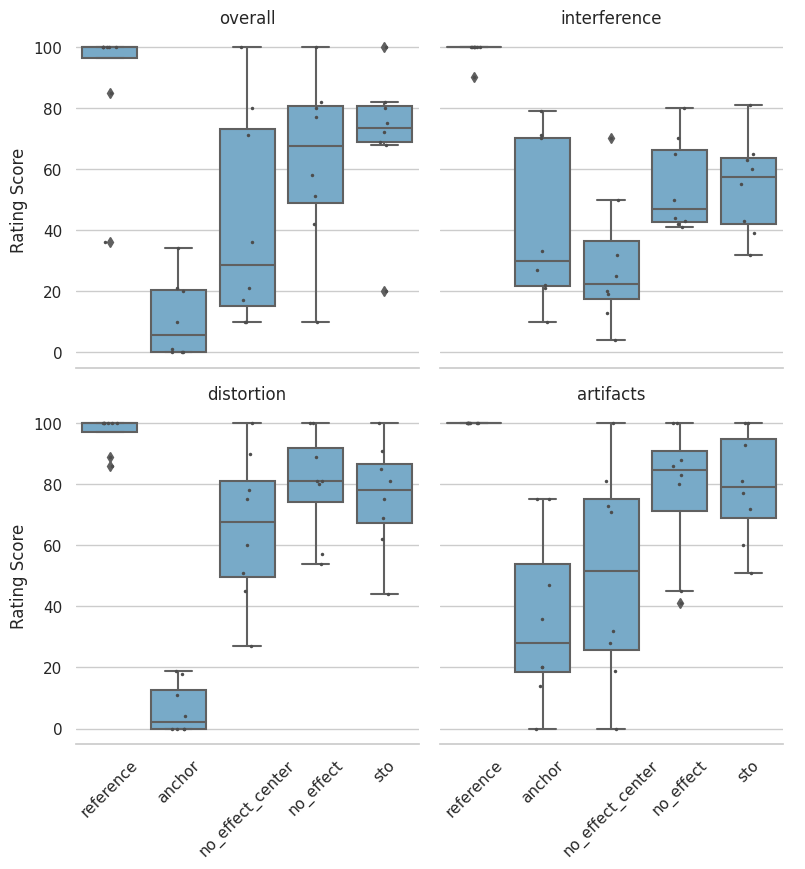

In [30]:
instruments = ['flute', 'clarinet', 'cello', '1st violin', '2nd violin']
for i in range(5):
    filename = "../results/p3s_atiam"+str(i)+"/mushra.csv"
    print("=====================================")
    print("Instrument: ", instruments[i])
    inst_data = read_data(filename)

    inst_data_no_inexperienced = analyze_evaluators(inst_data, remove_inexperienced_evaluators=True)
    inst_data_no_inexperienced_no_inconsistent = check_rating_consistency(inst_data_no_inexperienced, remove_inconsistent_evaluators=True)
    print("=====================================")
    inst_data_no_inexperienced_no_inconsistent = analyze_evaluators(inst_data_no_inexperienced_no_inconsistent, remove_inexperienced_evaluators=False)
    plot_ratings_boxplot(inst_data_no_inexperienced_no_inconsistent, save_fig=True, save_path='../results/mushra_'+instruments[i]+'_boxplot.pdf', show_fig=True)
    print("=====================================")

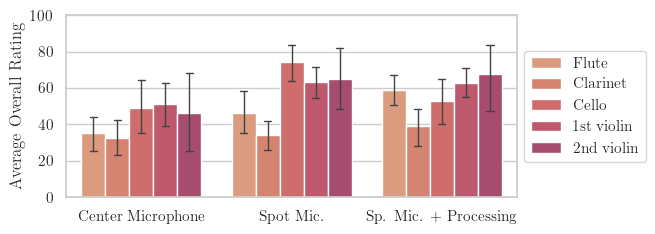

In [29]:
def plot_instrument_average(data, save_fig=False, save_path="ratings_instruments_boxplot.pdf", show_fig=False):
    stimuli_order = ['no_effect_center', 'no_effect', 'sto']
    data = data[data['trial_id'] == 'overall']
    data = data[data['rating_stimulus'].isin(stimuli_order)]

    sns.set(style="whitegrid")
    # blue color pallette
    g = sns.barplot(x='rating_stimulus', y='rating_score', hue='session_test_id', data=data, order=stimuli_order,
                    errorbar=('ci',95), errwidth=1, palette=sns.color_palette("flare", 8), capsize=.05)
    # set hue tags to flute, clarinet, cello, 1st violin, 2nd violin
    g.legend_.set_title('')
    # set legends horizontally
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    for t, l in zip(g.legend_.texts, ['Flute', 'Clarinet', 'Cello', '1st violin', '2nd violin']): t.set_text(l)
    # set bottom labels to Center Microphone, Spot Microphone, Spot Microphone + Processing
    g.set_xticklabels(['Center Microphone', 'Spot Mic.', 'Sp. Mic. + Processing'])
    # set axis labels
    g.set(xlabel='', ylabel='Average Overall Rating', ylim=(None, 100))


    # bigger and latex text
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Roman"
    })

    # set figure size in inches
    plt.gcf().set_size_inches(w=6.718, h=2.5)

    # tight layout
    plt.tight_layout()
       
    # save figure
    if save_fig:
        plt.savefig(save_path, dpi=600)
    if show_fig:
        plt.show()
    else:
        plt.close()

plot_instrument_average(data, save_fig=True, save_path='../results/mushra_overall_instruments.pdf', show_fig=True)
plot_instrument_average(data_no_inexperienced, save_fig=True, save_path='../results/mushra_overall_instruments_no_inexperienced.pdf')
plot_instrument_average(data_no_inconsistent, save_fig=True, save_path='../results/mushra_overall_instruments_no_inconsistent.pdf')
plot_instrument_average(data_no_inexperienced_no_inconsistent, save_fig=True, save_path='../results/mushra_overall_instruments_no_inexperienced_no_inconsistent.pdf')





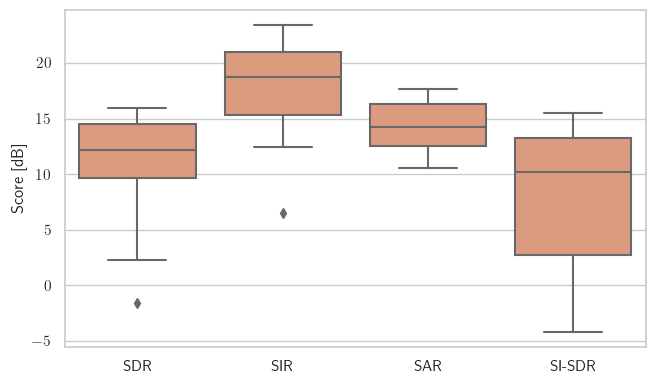

In [20]:
# array([ 2.33197087,  9.11495562, 11.71989707, 14.82891394, 15.99101576,
#        13.50202144, 12.69516869, 15.04360841, -1.61801102, 11.14790063]), array([12.46924282, 14.59496977, 19.80645356, 23.39173371, 21.34634745,
#        18.88035077, 18.62993491, 22.6899395 ,  6.54638237, 17.57932944]), array([13.98771142, 11.00966498, 12.65775234, 16.28976029, 17.63966668,
#        16.26746956, 14.44515217, 16.40408524, 10.59267384, 12.55103111]), array([-1.6237959 ,  6.46789807, 10.07495397, 13.98181408, 15.48012191,
#        10.40671798, 11.4567884 , 13.85911906, -4.17667521,  1.49296944])
# create array
sdr = [ 2.33197087,  9.11495562, 11.71989707, 14.82891394, 15.99101576,
         13.50202144, 12.69516869, 15.04360841, -1.61801102, 11.14790063]

sir = [ 12.46924282, 14.59496977, 19.80645356, 23.39173371, 21.34634745,
        18.88035077, 18.62993491, 22.6899395 ,  6.54638237, 17.57932944]

sar = [ 13.98771142, 11.00966498, 12.65775234, 16.28976029, 17.63966668,
        16.26746956, 14.44515217, 16.40408524, 10.59267384, 12.55103111]
sisdr = [ -1.6237959 ,  6.46789807, 10.07495397, 13.98181408, 15.48012191,
        10.40671798, 11.4567884 , 13.85911906, -4.17667521,  1.49296944]

# create dataframe
df = pd.DataFrame({'SDR': sdr, 'SIR': sir, 'SAR': sar, 'SI-SDR': sisdr})
df = df.melt(var_name='metric', value_name='value')

# plot
sns.set(style="whitegrid")
# get one color from flare color palette
g = sns.boxplot(x='metric', y='value', data=df, color=sns.color_palette("flare", 8)[0])
g.set(xlabel='', ylabel='Score [dB]')
# set figure size in inches
plt.gcf().set_size_inches(w=6.718, h=4)

plt.tight_layout()
plt.savefig('../results/objective_metrics_MUSDB.pdf', dpi=600)

# fig.set_size_inches(w=6.718, h=4)



# Old rubbish functions

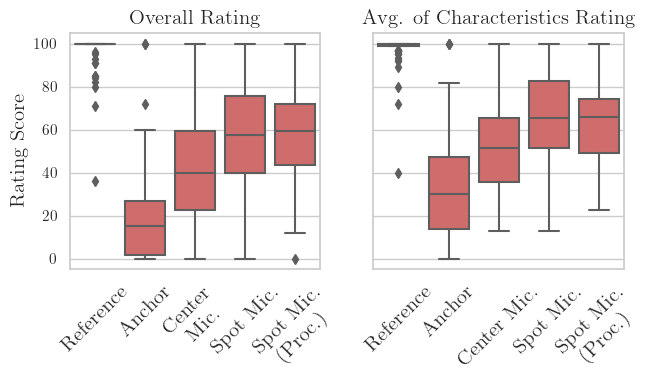

In [28]:
def plot_overall_vs_avg_boxplots(data, save_fig=False, save_path="ratings_boxplot.pdf", show_fig=False):
    # Plot the boxplots
    fig, axs = plt.subplots(ncols=2, figsize=(6,5))
    fig.set_size_inches(w=6.718, h=4)
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    overall_data = data[data['trial_id'] == 'overall']
    # g = sns.catplot(x='rating_stimulus', y='rating_score', kind='box', data=overall_data, 
    #                 order=stimuli_order, height=4, aspect=1.5)
    # palette=sns.color_palette("flare", 5)
    sns.boxplot(x='rating_stimulus', y='rating_score', data=overall_data,
                order=stimuli_order, ax=axs[0], color=sns.color_palette("flare", 8)[2])
    # sns.stripplot(x='rating_stimulus', y='rating_score', data=overall_data,
    #                 order=stimuli_order, color=".3", size=2.5, ax=axs[0])
    
    data = data[(data["trial_id"] == "interference") | (data["trial_id"] == "distortion") | (data["trial_id"] == "artifacts")]
    data = data.groupby(["rating_stimulus", "email", "age", "gender", "musical_training_years"], as_index=False)["rating_score"].mean()
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    sns.boxplot(x="rating_stimulus", y="rating_score", data=data, order=stimuli_order, color=sns.color_palette("flare", 8)[2])
    # sns.stripplot(x="rating_stimulus", y="rating_score", data=data, order=stimuli_order, color=".3", size=2.5)
    
    # Set the titles
    axs[0].set_title('Overall Rating', size=15)
    axs[1].set_title('Avg. of Characteristics Rating', size=15)

    # Set the labels
    axs[0].set_xlabel('')
    axs[0].set_ylabel('Rating Score', size=15)
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')

    # Set the tick labels
    axs[0].set_xticklabels(['Reference', 'Anchor', 'Center\n Mic.' ,'Spot Mic.', 'Spot Mic. \n(Proc.)'], rotation=45, size=15)
    axs[1].set_xticklabels(['Reference', 'Anchor', 'Center Mic.' ,'Spot Mic.', 'Spot Mic. \n(Proc.)'], rotation=45, size=15)
    axs[1].set_yticklabels([])

    # bigger and latex text
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Roman"
    })
    # tight layout
    plt.tight_layout()

    # save figure
    if save_fig:
        plt.savefig(save_path, dpi=600)
    if show_fig:
        plt.show()
    else:
        plt.close()


plot_overall_vs_avg_boxplots(data, save_fig=True, save_path='../results/mushra_overall_vs_avg_boxplot.pdf', show_fig=True)
plot_overall_vs_avg_boxplots(data_no_inexperienced, save_fig=True, save_path='../results/mushra_overall_vs_avg_no_inexperienced_boxplot.pdf')
plot_overall_vs_avg_boxplots(data_no_inconsistent, save_fig=True, save_path='../results/mushra_overall_vs_avg_no_inconsistent_boxplot.pdf')
plot_overall_vs_avg_boxplots(data_no_inexperienced_no_inconsistent, save_fig=True, save_path='../results/mushra_overall_vs_avg_no_inexperienced_no_inconsistent_boxplot.pdf')


# violin plots

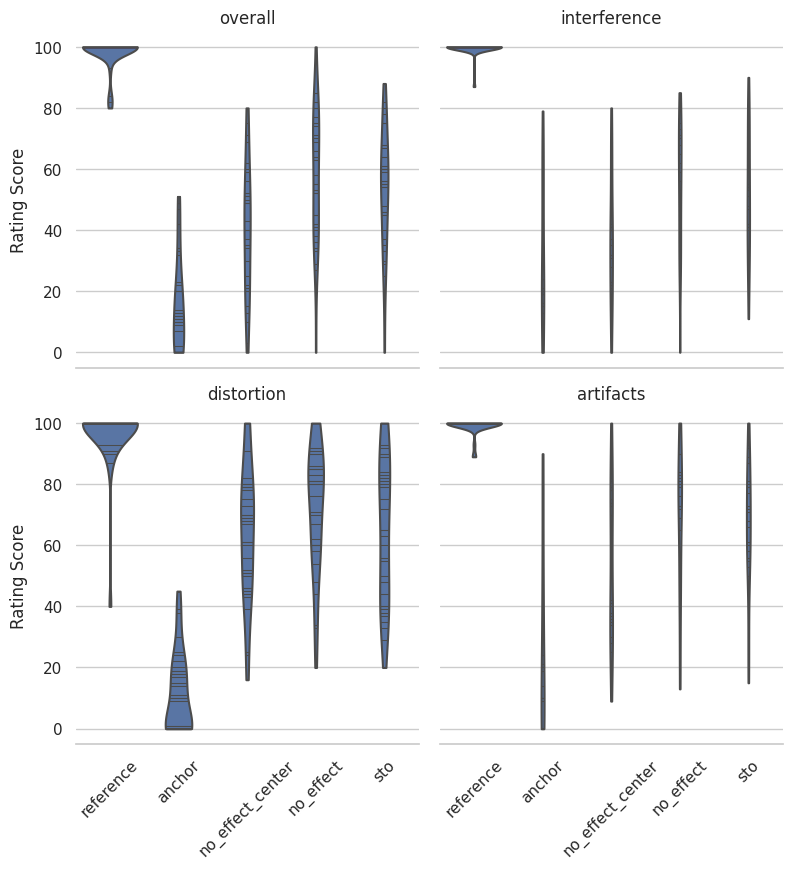

In [ ]:
def plot_ratings(data):
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    g = sns.FacetGrid(data, col="trial_id", col_wrap=2, height=4, xlim=(-1, len(stimuli_order)))
    g.map(sns.violinplot, "rating_stimulus", "rating_score", order=stimuli_order, inner="stick", cut=0)
    g.set_axis_labels("", "Rating Score")
    g.set_titles(col_template="{col_name}")
    g.tight_layout()
    g.add_legend()
    g.despine(left=True)
    g.set_xticklabels(stimuli_order, rotation=45)
    

plot_ratings(data)

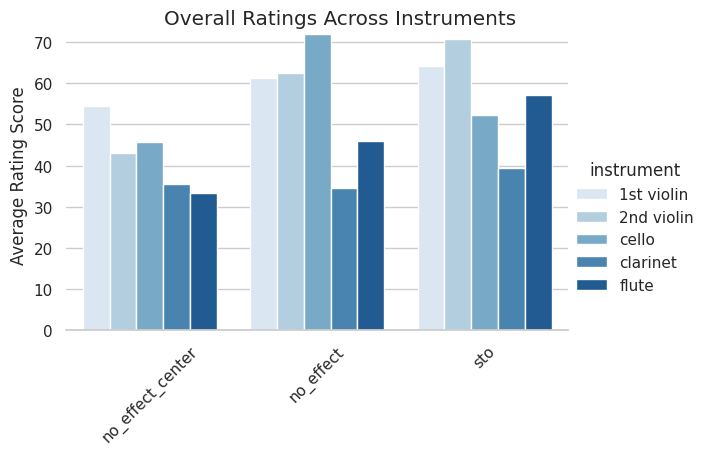

In [20]:
def plot_instrument_average(data, save_fig=False, save_path="ratings_instruments_boxplot.pdf", show_fig=False):
    stimuli_order = ['no_effect_center', 'no_effect', 'sto']
    instruments = {'P3S_ATIAM0': 'flute', 'P3S_ATIAM1': 'clarinet', 'P3S_ATIAM2': 'cello', 'P3S_ATIAM3': '1st violin', 'P3S_ATIAM4': '2nd violin'}
    overall_data = data[data['trial_id'] == 'overall']
    overall_data = overall_data[overall_data['rating_stimulus'].isin(stimuli_order)]
    overall_data['instrument'] = overall_data['session_test_id'].map(instruments)
    overall_data = overall_data.groupby(['instrument', 'rating_stimulus'])['rating_score'].mean().reset_index()

    sns.set(style="whitegrid")
    
    # add variance to bars
    g = sns.catplot(x='rating_stimulus', y='rating_score', hue='instrument', kind='bar', data=overall_data,
                    order=stimuli_order, height=4, aspect=1.5, errorbar='sd',
                    palette=sns.color_palette("flare", 5))
    
    g.set_axis_labels("", "Average Rating Score")
    g.fig.suptitle('Overall Ratings Across Instruments')
    g.despine(left=True)
    g.set_xticklabels(stimuli_order, rotation=45)
   

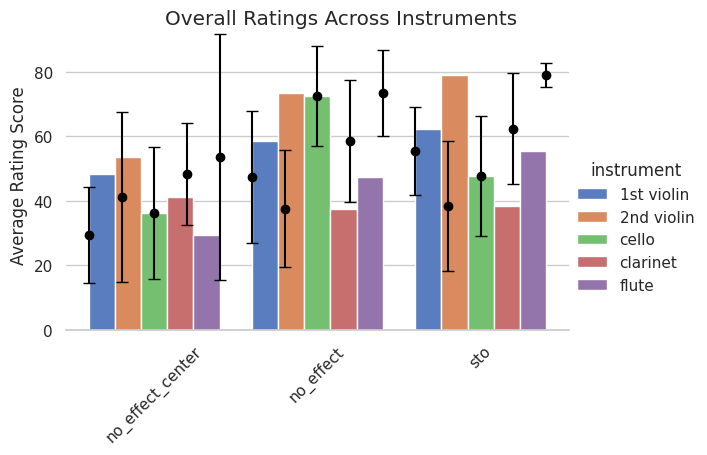

In [ ]:
def plot_instrument_average(data):
    stimuli_order = ['no_effect_center', 'no_effect', 'sto']
    instruments = {'P3S_ATIAM0': 'flute', 'P3S_ATIAM1': 'clarinet', 'P3S_ATIAM2': 'cello', 'P3S_ATIAM3': '1st violin', 'P3S_ATIAM4': '2nd violin'}
    overall_data = data[data['trial_id'] == 'overall']
    overall_data = overall_data[overall_data['rating_stimulus'].isin(stimuli_order)]
    overall_data['instrument'] = overall_data['session_test_id'].map(instruments)
    overall_data = overall_data.groupby(['instrument', 'rating_stimulus'])['rating_score'].agg(['mean', 'std']).reset_index()

    sns.set(style="whitegrid")
    
    # create bar plot
    g = sns.catplot(x='rating_stimulus', y='mean', hue='instrument', kind='bar', data=overall_data,
                    order=stimuli_order, height=4, aspect=1.5, 
                    palette=sns.color_palette("muted", 5))
    # add variance lines (std)
    
    
    g.set_axis_labels("", "Average Rating Score")
    g.fig.suptitle('Overall Ratings Across Instruments')
    g.despine(left=True)
    g.set_xticklabels(stimuli_order, rotation=45)
    for i, stim in enumerate(stimuli_order):
        for j, instr in enumerate(instruments.values()):
            mean = overall_data.loc[(overall_data['rating_stimulus'] == stim) & (overall_data['instrument'] == instr), 'mean']
            std = overall_data.loc[(overall_data['rating_stimulus'] == stim) & (overall_data['instrument'] == instr), 'std']
            g.ax.errorbar(i+j*0.2-0.4, mean, yerr=std, fmt='none', capsize=4, ecolor='black')
            # add mean point
            g.ax.plot(i+j*0.2-0.4, mean, 'o', color='black')
    
    # save figure
    plt.savefig('../results/mushra_overall_instruments.pdf', dpi=600)

plot_instrument_average(data)


/home/ivan/anaconda3/envs/P3S/lib/python3.10/site-packages/seaborn/categorical.py:761: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


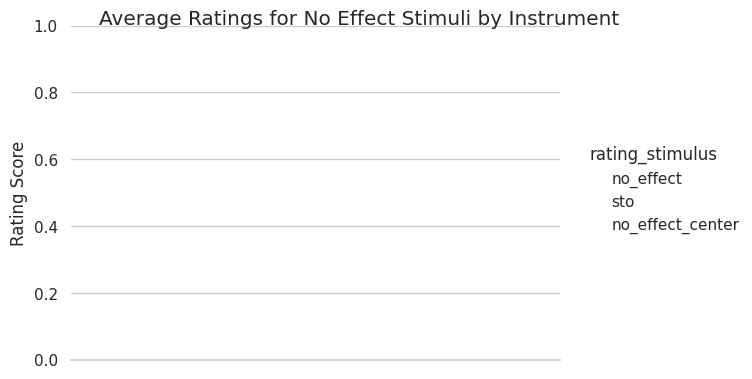

In [ ]:
def plot_instrument_boxplot(data):
    # Create a mapping between session_test_id and instrument names
    instruments_map = {
        "p3s_atiam0": "flute",
        "p3s_atiam1": "clarinet",
        "p3s_atiam2": "cello",
        "p3s_atiam3": "1st violin",
        "p3s_atiam4": "2nd violin"
    }

    # Filter data by overall trial_id and the three stimuli of interest
    stimuli = ["no_effect_center", "no_effect", "sto"]
    overall_data = data[data["trial_id"] == "overall"]
    overall_data = overall_data[overall_data["rating_stimulus"].isin(stimuli)]

    # Map session_test_id to instrument names
    overall_data["instrument"] = overall_data["session_test_id"].map(instruments_map)

    # Create the boxplot using seaborn
    sns.set(style="whitegrid")
    g = sns.catplot(x="instrument", y="rating_score", hue="rating_stimulus", kind="box", data=overall_data, height=4, aspect=1.5)
    g.set_axis_labels("", "Rating Score")
    g.fig.suptitle("Average Ratings for No Effect Stimuli by Instrument")
    g.despine(left=True)
    g.set_xticklabels(rotation=45)

    plt.show()
    

plot_instrument_boxplot(data)


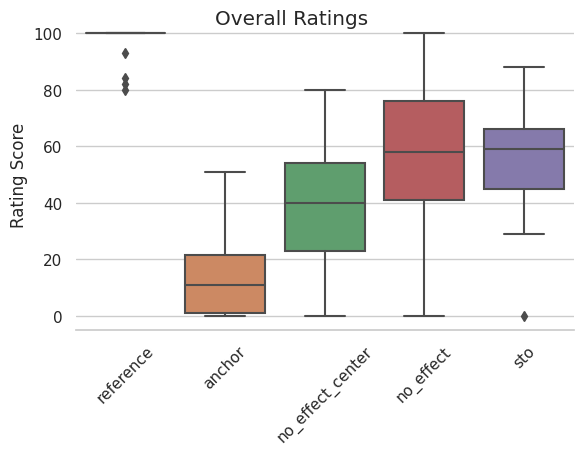

In [ ]:
def plot_overall_ratings_boxplot(data):
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    overall_data = data[data['trial_id'] == 'overall']
    g = sns.catplot(x='rating_stimulus', y='rating_score', kind='box', data=overall_data, 
                    order=stimuli_order, height=4, aspect=1.5)
    g.set_axis_labels("", "Rating Score")
    g.fig.suptitle('Overall Ratings')
    g.despine(left=True)
    g.set_xticklabels(stimuli_order, rotation=45)

plot_overall_ratings_boxplot(data)

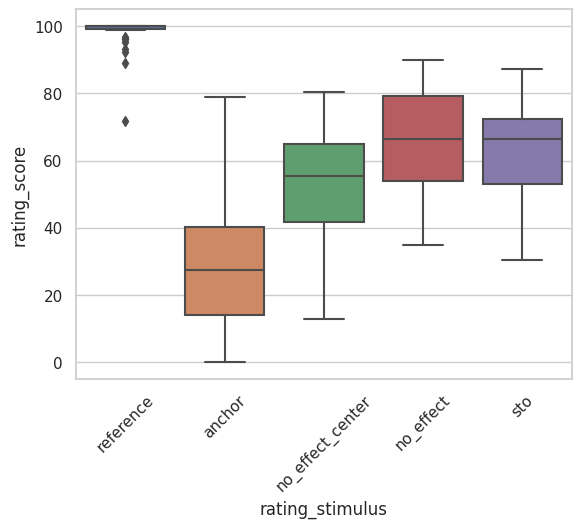

In [ ]:
def plot_average_rating_boxplot(data):
    data = data[(data["trial_id"] == "interference") | (data["trial_id"] == "distortion") | (data["trial_id"] == "artifacts")]
    data = data.groupby(["rating_stimulus", "email", "age", "gender", "musical_training_years"], as_index=False)["rating_score"].mean()
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    sns.boxplot(x="rating_stimulus", y="rating_score", data=data, order=stimuli_order)
    # rotate x labels
    plt.xticks(rotation=45)
    plt.show()

plot_average_rating_boxplot(data)


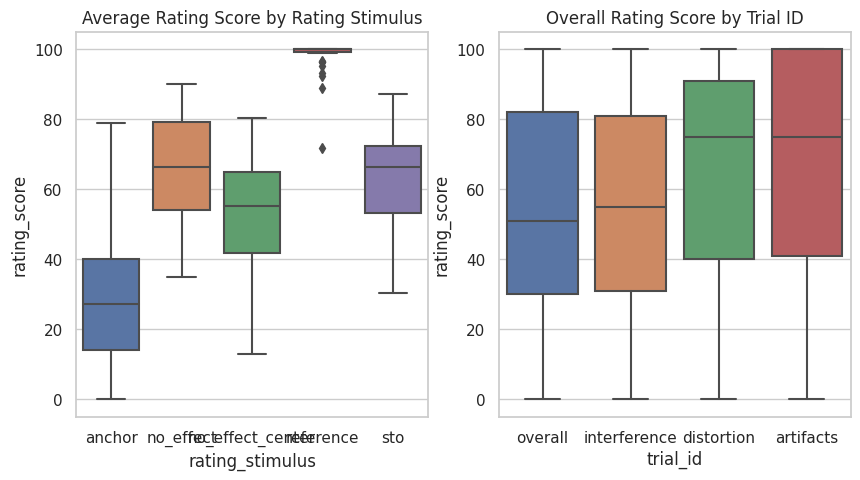

In [ ]:

def plot_boxplots(data):
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']

    avg_data = data[(data["trial_id"] == "interference") | (data["trial_id"] == "distortion") | (data["trial_id"] == "artifacts")]
    avg_data = avg_data.groupby(["rating_stimulus", "email", "age", "gender", "musical_training_years"], as_index=False)["rating_score"].mean()

    # Plot the boxplots
    fig, axs = plt.subplots(ncols=2, figsize=(10,5))
    sns.boxplot(x='rating_stimulus', y='rating_score', data=avg_data, ax=axs[0])

    sns.boxplot(x='trial_id', y='rating_score', data=data, ax=axs[1], order=['overall','interference', 'distortion', 'artifacts'])
    
    # Set the titles
    axs[0].set_title('Average Rating Score by Rating Stimulus')
    axs[1].set_title('Overall Rating Score by Trial ID')
    
    # Show the plot
    plt.show()

plot_boxplots(data)